<img src="../images/demos/FIUM.png" width="350px" class="pull-right" style="display: inline-block">

**ViA / Grado IngInf**<br>
curso 2018-19<br>
*[Alberto Ruiz](http://dis.um.es/profesores/alberto)*

---

# Machine Learning


## scikit-learn

Algunos algoritmos sencillos se podrían programar de cero si tuviéramos un poco más de tiempo. En nuestro caso es preferible practicar con la excelente biblioteca [scikit-learn](http://scikit-learn.org/stable/).

Es muy sencilla de usar. Por ejemplo, para entrenar un árbol de decisión con el clásico problema de clasificación de flores [IRIS](https://en.wikipedia.org/wiki/Iris_flower_data_set), se hace lo siguiente:

In [1]:
from sklearn import datasets

dataset = datasets.load_iris()

In [2]:
# dataset.keys()

In [3]:
# print(dataset['DESCR'])

Entrenamos un [árbol de decisión](https://en.wikipedia.org/wiki/Decision_tree_learning) con una parte de los ejemplos, reservando el resto para evaluar su calidad.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

(train_data  , test_data, 
 train_labels, test_labels) = train_test_split(dataset.data, dataset.target)

model = DecisionTreeClassifier()
model.fit(train_data, train_labels)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Ya podemos clasificar casos nuevos:

In [5]:
model.predict([ [6 , 3 , 3 , 1.5] ])

array([1])

Un objeto con ese vector de atributos se clasifica dentro de la clase 1, que corresponde a la flor *Iris- Versicolour*.

Finalmente, evaluamos la calidad del modelo obtenido con los ejemplos de test.

In [6]:
from sklearn import metrics

expected = test_labels
predicted = model.predict(test_data)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94        16
           2       1.00      0.67      0.80         6

   micro avg       0.95      0.95      0.95        38
   macro avg       0.96      0.89      0.91        38
weighted avg       0.95      0.95      0.94        38

[[16  0  0]
 [ 0 16  0]
 [ 0  2  4]]


El resultado depende de la partición aleatoria de los ejemplos, pero normalmente se clasifican casi todos bien. En realidad es un problema de clasificación muy sencillo.

## MNIST dataset

Nuestro objetivo es construir un sistema que reconozca números manuscritos en imágenes tomadas con una cámara. Para ello vamos a aprovechar la conocida base de datos MNIST:

http://yann.lecun.com/exdb/mnist/

*machine learning hello world*

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy             as np
import numpy.linalg      as la

In [8]:
mnist = np.load("../data/mnist.npz")

list(mnist.keys())

['yl', 'yt', 'xl', 'xt']

In [9]:
xl,yl,xt,yt = [mnist[d] for d in ['xl', 'yl', 'xt', 'yt']]

cl = np.argmax(yl,axis=1)
ct = np.argmax(yt,axis=1)

print(xl.shape, yl.shape, cl.shape)
print(xt.shape, yt.shape, ct.shape)

(60000, 784) (60000, 10) (60000,)
(10000, 784) (10000, 10) (10000,)


In [10]:
def shdig(v):
    x = np.reshape(v,[28,28])
    plt.imshow(1-x, 'gray', vmin=0, vmax=1, interpolation="nearest");

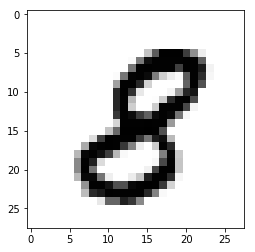

In [11]:
shdig(xl[5])

In [12]:
def muestrario(imgs,n=10):
    N = len(imgs)
    c = N // n
    r = N %  n
    L = imgs + [np.zeros_like(imgs[0]) for k in range(n-r)]
    return np.vstack([ np.hstack([ x for x in L[n*k : n*(k+1)]]) for k in range(c if n*c==N else c+1)])

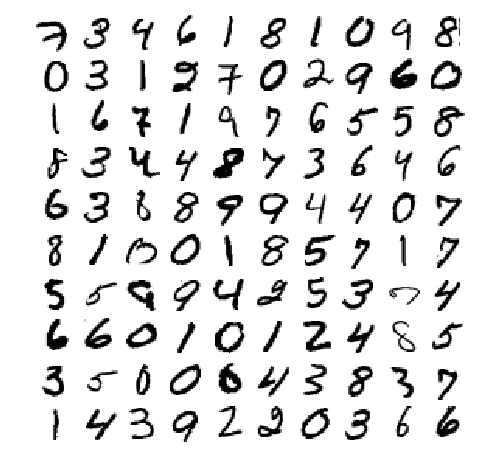

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(-muestrario([x.reshape(28,28) for x in xl[:100]]),'gray');
plt.axis('off');

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


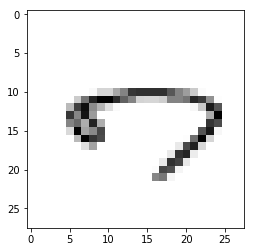

In [14]:
shdig(xl[68])
print(yl[68])
print(cl[68])

## Reducción de dimensión

La dimensión de los vectores de características es relativamente grande (28x28=784). Mediante el [análisis de componentes principales (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) esa dimensión se puede reducir sin demasiada pérdida de información.

In [15]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=20)
pca.fit(xl)
comprime    = pca.transform
descomprime = pca.inverse_transform

tr = comprime(xl)

### Proyección 2D

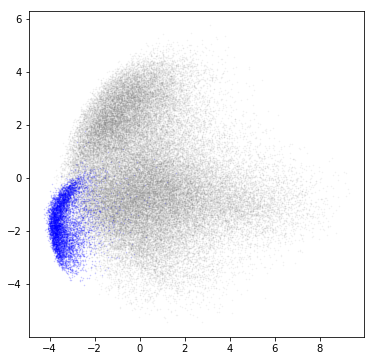

In [16]:
plt.figure(figsize=(6,6))
plt.plot(*tr[cl!=1][:,[0,1]].T,'.',markerSize=1,alpha=0.1,color='gray');
plt.plot(*tr[cl==1][:,[0,1]].T,'.',markerSize=1,alpha=0.2,color='blue');

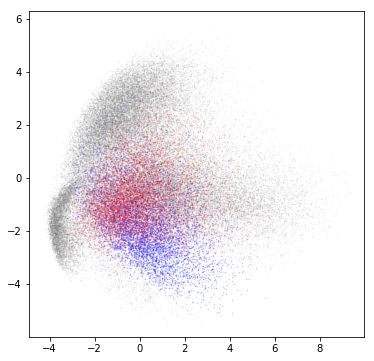

In [17]:
plt.figure(figsize=(6,6))
plt.plot(*tr[(cl!=3) & (cl!=8)][:,[0,1]].T,'.',markerSize=1,alpha=0.1,color='gray');
plt.plot(*tr[cl==3][:,[0,1]].T,'.',markerSize=1,alpha=0.2,color='blue');
plt.plot(*tr[cl==8][:,[0,1]].T,'.',markerSize=1,alpha=0.2,color='red');

### Calidad de la reconstrucción

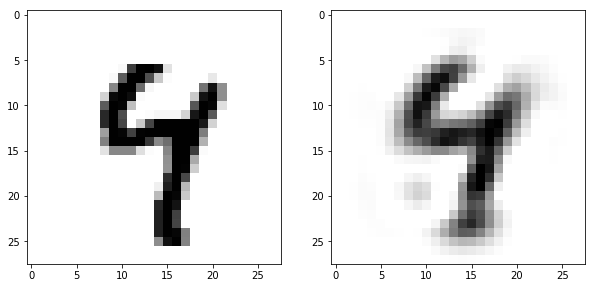

In [18]:
k = 2
plt.figure(figsize=(10,5))
plt.subplot(121)
shdig(xl[k])
plt.subplot(122)
shdig(descomprime(comprime([xl[k]]))[0])

### Modos de variación

(6131, 784)


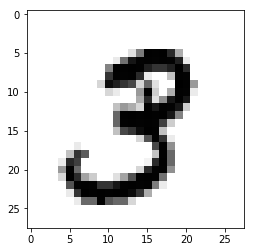

In [19]:
treses = xl[cl==3]
print(treses.shape)
shdig(treses[0])

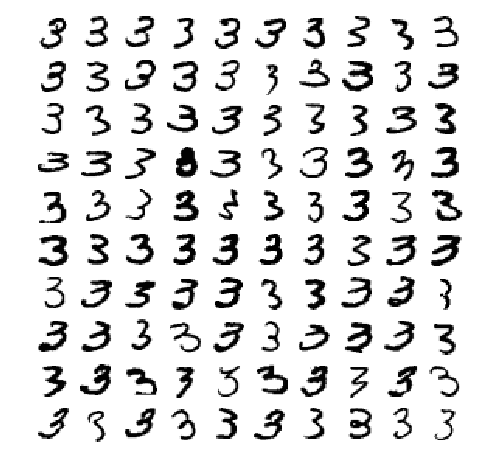

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(-np.bmat([[ x.reshape(28,28) for x in treses[10*k:10*(k+1)] ] 
                     for k in range(10)]),'gray'); plt.axis('off');

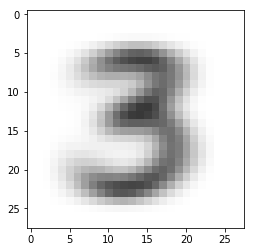

In [21]:
M = np.mean(treses,axis=0)
shdig(M)

In [22]:
C = np.cov(treses.T)
l,V = np.linalg.eigh(C)
V = np.flipud(V.T)

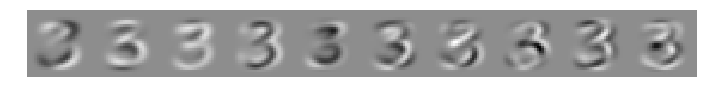

In [23]:
plt.figure(figsize=(12,4))
plt.imshow(-np.bmat([[ (V[k]).reshape(28,28) for k in range(10)]]),'gray'); plt.axis('off');

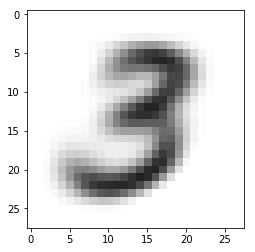

In [24]:
shdig(M + 3*V[0])

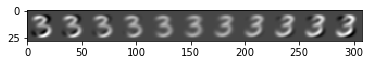

In [25]:
r = np.linspace(-7,7,11)

plt.imshow(np.bmat([[ (M + a*V[0]).reshape(28,28) for a in r]]),'gray');

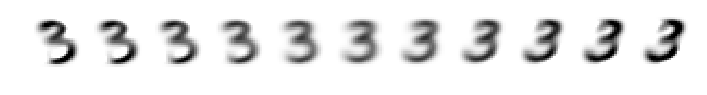

In [26]:
plt.figure(figsize=(12,4))
plt.imshow(1-np.bmat([[ (M + a*V[0]).reshape(28,28) for a in r]]),'gray',vmin=0,vmax=1);
plt.axis('off');

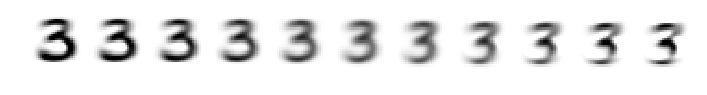

In [27]:
plt.figure(figsize=(12,4))
plt.imshow(1-np.bmat([[ (M + a*V[1]).reshape(28,28) for a in r]]),'gray',vmin=0,vmax=1);
plt.axis('off');

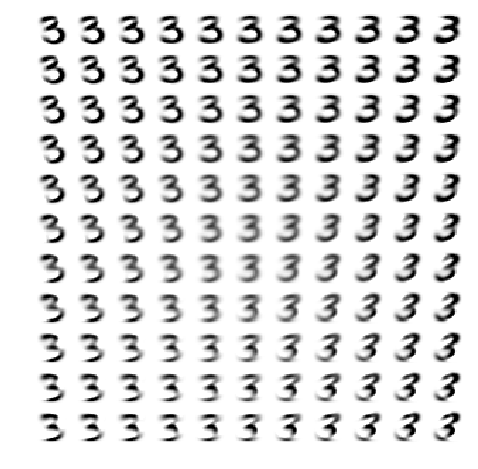

In [28]:
plt.figure(figsize=(8,8))

plt.imshow(1-np.bmat([[ (M + a*V[0] + b*V[1]).reshape(28,28) for a in r] for b in r]),'gray',vmin=0,vmax=1);
plt.axis('off');

## Clasificador Gaussiano

Usamos scikit-learn para construir un clasificador basado clases gaussianas y reducción de dimensión mediante componentes principales (PCA).

In [29]:
from sklearn import random_projection, decomposition, naive_bayes, discriminant_analysis
from sklearn.metrics import confusion_matrix

def acc(maq,x,y):
    return 100*(y == maq.predict(x)).sum() / len(y)

In [30]:
#transformer = random_projection.GaussianRandomProjection(n_components=60).fit(xl)
transformer = decomposition.PCA(n_components=40).fit(xl)

In [31]:
xrl = transformer.transform(xl)
xrt = transformer.transform(xt)

Un clasificador "naive Bayes" tiene más de un 12% de errores, mientras que el gaussiano completo consigue menos de 4%:

In [32]:
gnb = naive_bayes.GaussianNB()

In [33]:
maq = gnb.fit(xrl, cl)

In [34]:
acc(maq,xrt,ct)

87.51

In [35]:
maq = discriminant_analysis.QuadraticDiscriminantAnalysis(store_covariance=True).fit(xrl,cl)

In [36]:
acc(maq,xrt,ct)

96.23

In [37]:
confusion_matrix(ct, maq.predict(xrt))

array([[ 971,    0,    0,    0,    0,    4,    0,    1,    4,    0],
       [   0, 1099,   11,    4,    1,    1,    1,    0,   18,    0],
       [   3,    0, 1004,    4,    2,    0,    3,    1,   15,    0],
       [   1,    0,    8,  973,    0,    7,    0,    2,   14,    5],
       [   2,    0,    5,    0,  963,    0,    2,    1,    3,    6],
       [   3,    0,    0,   24,    0,  857,    1,    0,    5,    2],
       [   7,    1,    1,    0,    3,   15,  924,    0,    7,    0],
       [   0,    4,   30,    2,    1,    4,    0,  954,   14,   19],
       [   3,    0,    8,   14,    1,    5,    1,    2,  930,   10],
       [   4,    0,   12,    6,   11,    3,    0,    8,   17,  948]])

Podemos clasificar cualquier imagen en el formato 28x28 adecuado:

array([8])

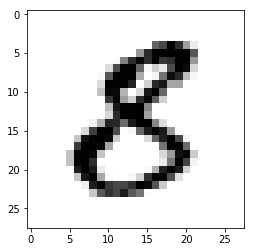

In [38]:
dig = xt[1234]

shdig(dig)

maq.predict(transformer.transform(dig.reshape(1,-1)))

(Se hace `reshape` porque la máquina clasifica conjuntos de vectores de características como filas de una matriz.)

## Imagen real

Para que los clasificadores funcionen bien con imágenes reales es necesario [normalizarlas](http://yann.lecun.com/exdb/mnist/) para que tengan el mismo tamaño y posición que los ejemplos de entrenamiento.

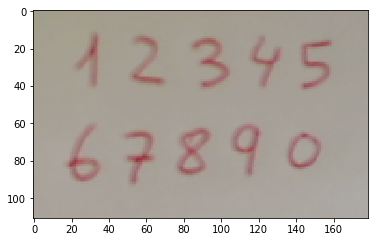

In [39]:
import cv2 as cv

digits = cv.cvtColor(cv.imread('../images/mydigits.png'),cv.COLOR_BGR2RGB);
plt.imshow(digits);

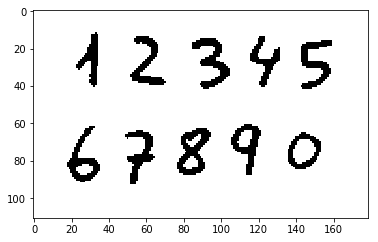

In [40]:
ret, gt = cv.threshold(cv.cvtColor(digits,cv.COLOR_RGB2GRAY),189,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(gt,'gray');

In [41]:
def center(p):
    r,c = p.shape
    rs = np.outer(range(r),np.ones(c))
    cs = np.outer(np.ones(r),range(c))
    s = np.sum(p)
    my  = np.sum(p*rs) / s
    mx  = np.sum(p*cs) / s
    return mx,my

def boundingBox(c):
    (x1, y1), (x2, y2) = c.min(0), c.max(0)
    return (x1, y1), (x2, y2)

def adaptsize(x):
    h,w = x.shape
    s = max(h,w)
    h2 = (s-h)//2
    w2 = (s-w)//2
    y = x
    if w2>0:
        z1 = np.zeros([s,w2])
        z2 = np.zeros([s,s-w-w2])
        y  = np.hstack([z1,x,z2])
    if h2>0:
        z1 = np.zeros([h2,s])
        z2 = np.zeros([s-h-h2,s])
        y  = np.vstack([z1,x,z2])
    y = cv.resize(y,(20,20))/255
    mx,my = center(y)
    H = np.array([[1.,0,4-(mx-9.5)],[0,1,4-(my-9.5)]])
    return cv.warpAffine(y,H,(28,28))

In [46]:
contours,_ = cv.findContours(255-gt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[-2:]
regions = [ boundingBox(x.reshape(-1,2)) for x in contours ]
raw = [ 255-gt[y1:y2,x1:x2] for (x1,y1),(x2,y2) in regions if x2-x1 > 10 and y2-y1 > 10]
ok = [ adaptsize(x) for x in raw ]

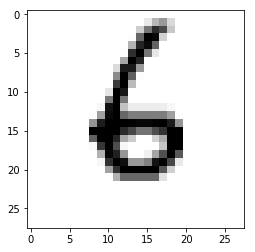

In [47]:
plt.imshow(-ok[3],'gray');

Una vez hecho esto se pueden utilizar con el clasificador igual que antes:

array([7])

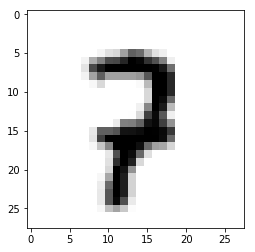

In [48]:
dig = ok[1].flatten()

shdig(dig)

maq.predict(transformer.transform(dig.reshape(1,-1)))

array([0, 7, 8, 6, 9, 5, 3, 4, 2, 4])

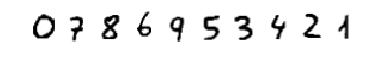

In [49]:
digits = np.array(ok).reshape(-1,28*28)

plt.imshow(-np.hstack([x.reshape(28,28) for x in ok]),'gray'); plt.axis('off');

maq.predict(transformer.transform(digits))

## Validez del modelo gaussiano

Si el modelo gaussiano de la distribución de clases es correcto podríamos generar muestras sintéticas realistas.

### Muestras sintéticas

[0.02433849 0.05639416]
[[ 4.09609085 -3.09408896]
 [-3.09408896  5.11375213]]


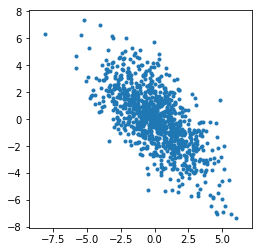

In [6]:
C = np.array([[4,-3],[-3,5]])
if False:
    kk = np.random.multivariate_normal((0,0),C,1000)
else:
    CC = np.linalg.cholesky(C)  # ojo
    kk = np.random.randn(1000,2) @ CC.T
    
plt.figure(figsize=(4,4))
plt.plot(*kk.T,'.');
plt.axis('equal');
print(np.mean(kk,axis=0))
print(np.cov(kk.T))

In [7]:
from sklearn import decomposition

In [8]:
selected = xl[cl==3]

pca = decomposition.PCA(n_components=5)

pca.fit(selected)
#pca.fit(xl)

tr = pca.transform(selected)

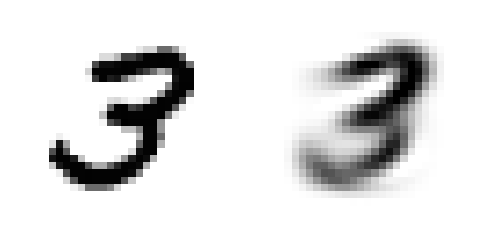

In [9]:
k = 5

plt.figure(figsize=(8,4))
plt.subplot(121)
shdig(selected[k])
plt.axis('off');
plt.subplot(122)
shdig(pca.inverse_transform(tr[[k]])[0])
plt.axis('off');

In [10]:
M = np.mean(tr,axis=0)
C = np.cov(tr.T)

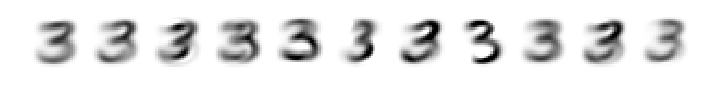

In [11]:
plt.figure(figsize=(12,4))
plt.imshow(1-np.bmat([[ pca.inverse_transform([np.random.multivariate_normal(M,C)])[0].reshape(28,28) for _ in range(11)]]),'gray',vmin=0,vmax=1);
plt.axis('off');

Otra posibilidad es hacer un [QQ plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) para comparar gráficamente las distribución de distancias de Mahalanobis, que es chi cuadrado.

Caso de prueba con una gaussiana real:

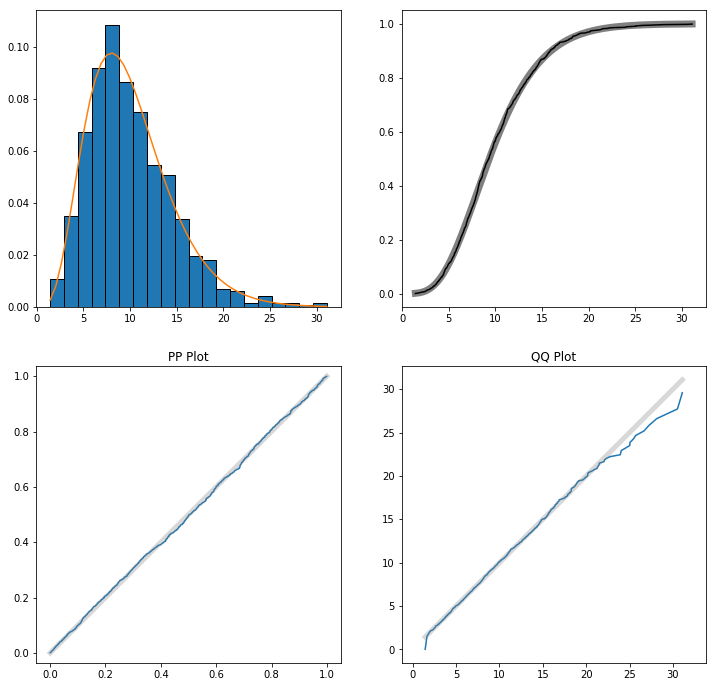

In [12]:
from scipy.stats import chi2

df = 10
data = np.sum(np.random.randn(1000,df)**2,axis=1)

rv = chi2(df)

x = sorted(data)
n = len(x)
y = np.linspace(1/n,1,n)
y = np.arange(n)/n

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.hist(data,bins=20,edgecolor='black',density=True);
X = np.linspace(min(data),max(data),50)
plt.plot(X,rv.pdf(X));

plt.subplot(222)
plt.plot(x, rv.cdf(x), lw=7,color='gray');
plt.plot(x,y,color='black');

plt.subplot(223)
plt.plot(y,rv.cdf(x));
plt.plot([0,1],[0,1],'gray',lw=5,alpha=0.3)
plt.axis('equal'); plt.title('PP Plot')

plt.subplot(224)
plt.plot(x, rv.ppf(y))
mn = np.min(x)
mx = np.max(x)
plt.plot([mn,mx],[mn,mx],'gray',lw=5,alpha=0.3)
plt.axis('equal'); plt.title('QQ Plot');

#print(mn,mx)

Con los dígitos seleccionados:

In [13]:
def distMah2(m,ic,v):
    return (v-m) @ ic @ (v-m)

def dm(m,c):
    ic = np.linalg.inv(c)
    return lambda v: distMah2(m,ic,v)

In [14]:
d = dm(M,C)

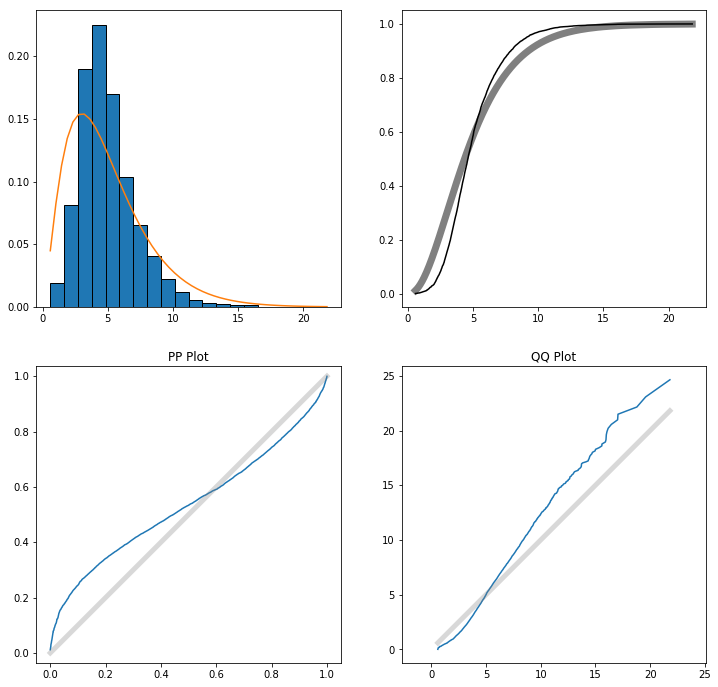

In [15]:
data = [d(x) for x in tr]

df = len(M)

rv = chi2(df)

x = sorted(data)
n = len(x)
y = np.linspace(1/n,1,n)
y = np.arange(n)/n

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.hist(data,bins=20,edgecolor='black',density=True);
X = np.linspace(min(data),max(data),50)
plt.plot(X,rv.pdf(X));

plt.subplot(222)
plt.plot(x, rv.cdf(x), lw=7,color='gray');
plt.plot(x,y,color='black');

plt.subplot(223)
plt.plot(y,rv.cdf(x));
plt.plot([0,1],[0,1],'gray',lw=5,alpha=0.3)
plt.axis('equal'); plt.title('PP Plot')

plt.subplot(224)
plt.plot(x, rv.ppf(y))
mn = np.min(x)
mx = np.max(x)
plt.plot([mn,mx],[mn,mx],'gray',lw=5,alpha=0.3)
plt.axis('equal'); plt.title('QQ Plot');

#print(mn,mx)

No es exactamente normal. A pesar de ello, si las nubes no están muy solapadas el clasificador se comportará bien.

### Objetos extremos

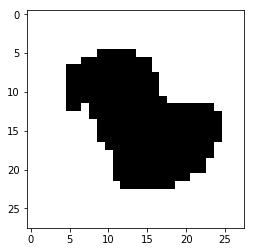

In [16]:
raro=np.argmax(data)
shdig(selected[raro])

In [17]:
raros = sorted(range(len(selected)),key=lambda k:d(tr[k]))

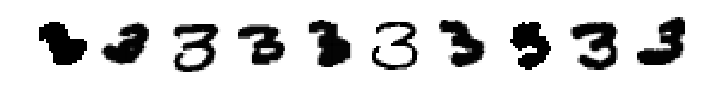

In [18]:
plt.figure(figsize=(12,4))
plt.imshow(1-np.bmat([[ selected[raros[-k]].reshape(28,28) for k in range(1,11)]]),'gray',vmin=0,vmax=1);
plt.axis('off');

## Regularización

Para conseguir **generalización** es necesario controlar la capacidad de la máquinas de aprendizaje.

Vamos a ilustrar este principio con una máquina lineal. Seleccionamos dos clases y ponemos las salidas deseadas de la máquina a valores +1 y -1:

In [8]:
n = 100
ca = 4
cb = 9

# seleccionamos las posiciones de las clases que nos interesan
sel_l = (cl == ca) | (cl==cb)
sel_t = (ct == ca) | (ct==cb)

# extraemos esas posiciones
# x e y seleccionadas para aprendizaje
# usaré solo los n primeros para aprender
xsl = xl[sel_l][:n]
ysl = cl[sel_l].astype(int)[:n]

# y ponemos correctamente los valores deseados, positivo o negativo
ysl[ysl==ca] =  1
ysl[ysl==cb] = -1

# y lo mismo para el x e y seleccionadas para test (evaluación independiente)
xst = xt[sel_t]
yst = ct[sel_t].astype(int)

yst[yst==ca] =  1
yst[yst==cb] = -1

In [9]:
np.sum(sel_l)

11791

In [10]:
def shdig(v):
    x = np.reshape(v,[28,28])
    plt.imshow(1-x, 'gray', vmin=0, vmax=1, interpolation="nearest");

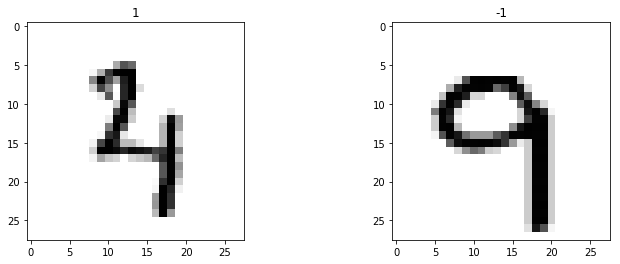

In [43]:
k1,k2 = 55, 56
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
shdig(xsl[k1])
plt.title(ysl[k1])
plt.subplot(1,2,2)
shdig(xsl[k2])
plt.title(ysl[k2]);

In [16]:
xsl.shape

(100, 784)

In [17]:
yst

array([ 1,  1, -1, ...,  1, -1,  1])

conveniente para añadir el término independiente (offset) a una máquina lineal

In [18]:
def homog(x):
    r,c = x.shape
    return np.hstack([x, np.ones([r,1])])

solución de mínimos cuadrados para un sistema lineal

Deseo encontrar $W$ tal que `xsl @ w = ysel`

O sea, resolver $X w= y$

Usarmos `lstsq` del módulo de álgebra lineal `numpy.linalg`, que obtiene la solución de mínimo error cuadrático de un sistema (ver el notebook de [sistemas de ecuaciones](sistecs.ipynb)).

`lstsq` no es lo ideal para mostrar este efecto en el caso no regularizado, porque para sistemas subdeterminados obtiene la solución de mínima norma, y por tanto, también regulariza.

In [23]:
W,_,_,_ = la.lstsq(homog(xsl),ysl)

/home/brutus/apps/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [24]:
#W

In [25]:
#homog(xsl) @ W

In [26]:
#np.sign(homog(xsl) @ W) == np.sign(ysl)

contamos los aciertos

In [27]:
np.sum(np.sign(homog(xsl) @ W) == np.sign(ysl)), len(ysl)

(100, 100)

Tiene buena pinta, acierta todos los ejemplos de entrenamiento.

In [34]:
np.sign(homog(xst) @ W) == np.sign(yst)

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
np.sum(np.sign(homog(xst) @ W) == np.sign(yst)), len(yst)

(1740, 1991)

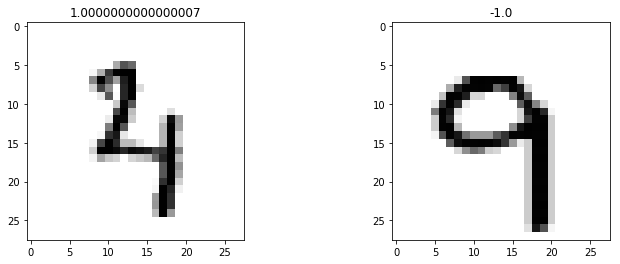

In [44]:
k1,k2 = 55, 56
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
shdig(xsl[k1])
plt.title((homog(xsl) @ W)[k1])
plt.subplot(1,2,2)
shdig(xsl[k2])
plt.title((homog(xsl) @ W)[k2]);

Obtiene exactamente los valores deseados $\pm 1$, ya que tiene más grados de libertad (coeficientes ajustables) que restricciones (ecuaciones, número de ejemplos de entrenamiento). Esto inspira poca confianza en el comportamiento con ejemplos desconocidos:

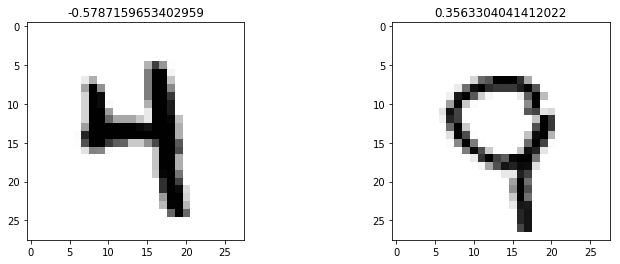

In [46]:
k1,k2 = 70, 55
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
shdig(xst[k1])
plt.title((homog(xst) @ W)[k1])
plt.subplot(1,2,2)
shdig(xst[k2])
plt.title((homog(xst) @ W)[k2]);

Vamos a construir una solución regularizada, que penaliza con un peso $\lambda$ el tamaño de los coeficientes, para que se reduzca la interpolación de detalles irrelevantes.

La solución regularizada es muy parecida a la de mínimos cuadrados, pero hay que "inflar" la covarianza $X^TX$ con $\lambda$. En lugar de 

$w = (X^T X) ^{-1} X^T y$

(esto es lo que hace internamente lstsq, es la "pseudoinversa" de X, por y)

hacemos

$w = (X^T X + \lambda I) ^{-1} X^T y$

In [47]:
lam = 2E2

D = np.diag(lam*np.ones([784+1]))
D[-1,-1] = 0
# el coeficiente  b no se regulariza,
# porque la posición del hiperplano puede ser cualquiera, no hay que 
# promover que se acerque al origen

In [281]:
#D

In [48]:
xh = homog(xsl)
Wr = la.solve(xh.T @ xh + D, xh.T @ ysl)

In [49]:
np.sum(np.sign(homog(xsl) @ Wr) == np.sign(ysl)), len(ysl)

(98, 100)

In [50]:
np.sum(np.sign(homog(xst) @ Wr) == np.sign(yst)), len(yst)

(1846, 1991)

**Ejercicio**: crea una curva comparando $E_L$ con $E_T$ para valores crecientes de $\lambda$.

In [77]:
Lam = [0.01, 0.1, 1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000, 5000]

def regu():
    xh = homog(xsl)
    L = []
    T = []
    for l in Lam:
        lam = 2E2
        D = np.diag(l*np.ones([784+1]))
        D[-1,-1] = 0
        Wr = la.solve(xh.T @ xh + D, xh.T @ ysl)
        EL = np.sum(np.sign(homog(xsl) @ Wr) == np.sign(ysl)), len(ysl)
        ET = np.sum(np.sign(homog(xst) @ Wr) == np.sign(yst)), len(yst)
        L.append(EL[0]/EL[1])
        T.append(ET[0]/ET[1])
    return 1-np.array(L), 1-np.array(T)

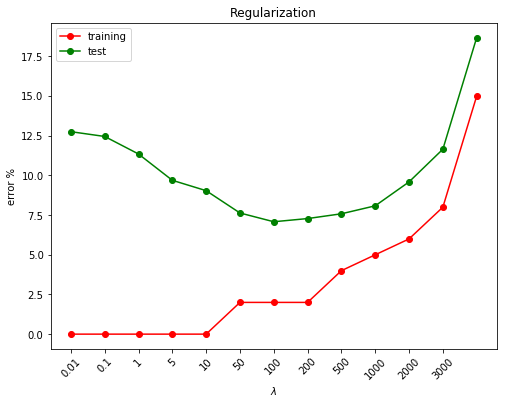

In [93]:
plt.figure(figsize=(8,6))
l,t = regu()
plt.plot(100*l,'o-',label='training',color='red')
plt.plot(100*t,'o-',label='test',color='green')
plt.xticks(np.arange(12), Lam, rotation=45)
plt.legend()
plt.xlabel('$\lambda$'); plt.ylabel('error %')
plt.title('Regularization');

Esta gráfica ilustra el principio teórico fundamental de *machine learning*: la **generalización** está relacionada con la **capacidad** de la máquina. 

## *Adversarial examples*

Es posible sintetizar instancias aparentemente inocentes pero que confunden al clasificador.

### Gaussian classifier

In [6]:
from sklearn import decomposition, discriminant_analysis

def acc(maq,x,y):
    return 100*(y == maq.predict(x)).sum() / len(y)

In [7]:
transformer = decomposition.PCA(n_components=40).fit(xl)

In [8]:
xrl = transformer.transform(xl)
xrt = transformer.transform(xt)

Un clasificador "naive Bayes" tiene más de un 12% de errores, mientras que el gaussiano completo consigue menos de 4%:

In [9]:
maq = discriminant_analysis.QuadraticDiscriminantAnalysis(store_covariance=True).fit(xrl,cl)

In [10]:
acc(maq,xrt,ct)

96.28

### Adversarial examples

In [11]:
def mkg(transformer,maquina,cl,v):
    d0 = transformer.transform([v])[0] - maquina.means_[cl]
    d1 = np.linalg.inv(maquina.covariance_[cl]) @ d0
    d2 = transformer.inverse_transform(d1)
    return d2

array([2.93988981e-10, 9.99998707e-01])

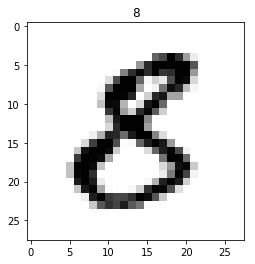

In [12]:
cdesired = 5

k = 1234
v0 = xt[k]
v = v0
corig = ct[k]
shdig(v0); plt.title(corig);
redu = transformer.transform([v])
maq.predict_proba(redu)[0][[cdesired,corig]]

array([0.52711151, 0.47282164])

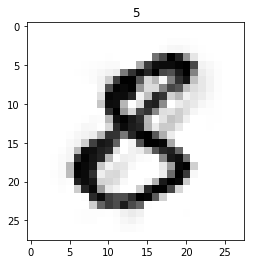

In [13]:
for _ in range(10):
    g = mkg(transformer, maq, corig, v) - mkg(transformer, maq, cdesired, v)
    v = np.clip(v + 0.01*g, 0, 1)
    redu = transformer.transform([v])
    cp = maq.predict(redu)[0]
    if cp != corig: break
    
shdig(v)
plt.title(cp)
maq.predict_proba(redu)[0][[cdesired,corig]]

15.84989


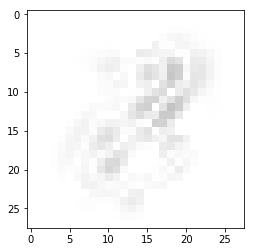

In [14]:
shdig(abs(v-v0))
print(np.sum(abs(v-v0)))

### Random inputs

0.9579858053216678

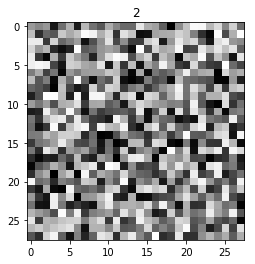

In [15]:
v0 = np.random.rand(28,28).flatten()
shdig(v0)
v = v0
redu = transformer.transform([v])
plt.title(maq.predict(redu)[0]);
maq.predict_proba(redu)[0].max()

0.9992338176090401

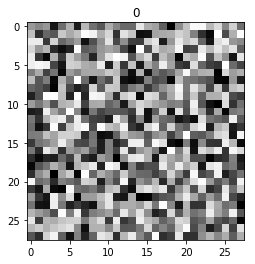

In [16]:
cdesired = 0
for _ in range(3):
    g = - mkg(transformer, maq, cdesired, v)
    v = np.clip(v + 0.01*g, 0, 1)
    redu = transformer.transform([v])
    cp = maq.predict(redu)[0]
    
shdig(v)
plt.title(cp)
maq.predict_proba(redu)[0][cdesired]

In [17]:
maq.predict_proba(redu)[0]

array([9.99233818e-01, 0.00000000e+00, 7.26036111e-04, 4.43242351e-08,
       1.70266218e-34, 3.89210424e-05, 3.29263193e-29, 1.11126225e-53,
       1.18091294e-06, 4.25241712e-31])

10.46400383834251


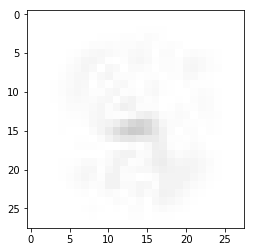

In [18]:
shdig(abs(v-v0))
print(np.sum(abs(v-v0)))

## Otras máquinas de aprendizaje

### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

maq = gnb.fit(xl, cl)

In [39]:
acc(maq,xt,ct)

55.58

In [40]:
maq.predict(digits)

array([0, 9, 8, 6, 9, 8, 3, 8, 6, 6])

In [41]:
maq.sigma_ = maq.sigma_ * 0 + 1

In [42]:
acc(maq,xt,ct)

82.05

In [43]:
maq.predict(digits)

array([0, 2, 8, 6, 9, 5, 3, 9, 2, 1])

### Support vector machine (SVM)

In [44]:
from sklearn import svm

classifier = svm.SVC(gamma=0.01, C=0.1)
#classifier = svm.SVC(gamma=0.001)

classifier.kernel

'rbf'

In [45]:
maq = classifier.fit(xl[:5000], cl[:5000])

maq.support_vectors_.shape

(3731, 784)

In [46]:
acc(maq,xt,ct)

90.9

In [47]:
maq.predict(digits)

array([0, 2, 8, 6, 9, 5, 3, 4, 2, 1])

In [39]:
#import pickle
#s = pickle.dumps(maq)

In [40]:
#from sklearn.externals import joblib
#joblib.dump(maq, 'svm.pkl') 

['svm.pkl']

In [41]:
#maq = joblib.load('svm.pkl') 

### Gradient Boosting

In [24]:
from sklearn import ensemble

In [39]:
clf = ensemble.GradientBoostingClassifier(subsample=0.1, n_estimators=50, max_features=50, min_samples_split=10)

clf.fit(xl, cl)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=50, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.1, verbose=0,
              warm_start=False)

In [40]:
clf.score(xl,cl), clf.score(xt,ct)

(0.9142166666666667, 0.9137)

### Random Forest

In [52]:
clf = ensemble.RandomForestClassifier(n_estimators=100,n_jobs=-1)

clf.fit(xl, cl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
clf.score(xl,cl), clf.score(xt,ct)

(1.0, 0.9696)

### CNN

Red convolucional profunda (ver [deep learning](tensorflow.ipynb)).

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Softmax, Flatten

model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5,5), strides=1,
                 padding='same', use_bias=True, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=1,
                 padding='same', use_bias=True, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [36]:
if False:
    model.fit(xl.reshape(-1,28,28,1), yl, epochs=50, batch_size=500)
    #model.save('digits.keras')
else:
    #wget https://robot.inf.um.es/material/va/digits.keras
    model.load_weights('../data/models/digits.keras')
    
model.evaluate(xt.reshape(-1,28,28,1),yt, batch_size=500)

10000/10000 [==============================] - 8s 767us/step


[0.028063314117025583, 0.9907000005245209]

array([0, 7, 8, 6, 9, 5, 3, 4, 2, 1])

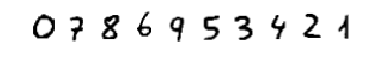

In [37]:
plt.imshow(-np.hstack([x.reshape(28,28) for x in ok]),'gray'); plt.axis('off');

model.predict_classes(np.array(ok).reshape(-1,28,28,1))